In [2]:
#Importing Relevant Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.model_selection import KFold


In [3]:
raw_data = pd.read_csv('diabetes_dataset.csv')

Data Preprocessing

In [29]:
#checking for null values
raw_data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [4]:
raw_data['smoking_history'].unique()

array(['ever', 'never', 'current', 'No Info', 'former', 'not current'],
      dtype=object)

In [5]:
raw_data['gender'] = raw_data['gender'].map({'Female':0, 'Male':1, 'Other':2})

In [6]:
raw_data['smoking_history']  = raw_data['smoking_history'].map({'current':0, 'ever':1, 'former':2, 'never':3, 'No Info':4, 'not current':5})

In [7]:
#checking for infinity values
infinities = np.any(np.isinf(raw_data))

In [8]:
print(infinities)

False


In [35]:
raw_data.describe()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,18700.000000,18700.000000,18700.000000,18700.000000,18700.000000,18700.000000,18700.000000,18700.000000,18700.000000
mean,0.438717,49.708083,0.142888,0.082888,2.908556,29.203025,6.095444,160.461070,0.454545
std,0.496459,21.756392,0.349968,0.275720,1.327645,7.352430,1.277635,55.972938,0.497943
min,0.000000,0.080000,0.000000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,34.000000,0.000000,0.000000,2.000000,25.660000,5.700000,130.000000,0.000000
50%,0.000000,53.000000,0.000000,0.000000,3.000000,27.320000,6.100000,155.000000,0.000000
75%,1.000000,67.000000,0.000000,0.000000,4.000000,32.420000,6.600000,160.000000,1.000000
max,2.000000,80.000000,1.000000,1.000000,5.000000,88.720000,9.000000,300.000000,1.000000


Feature Selection

<Axes: >

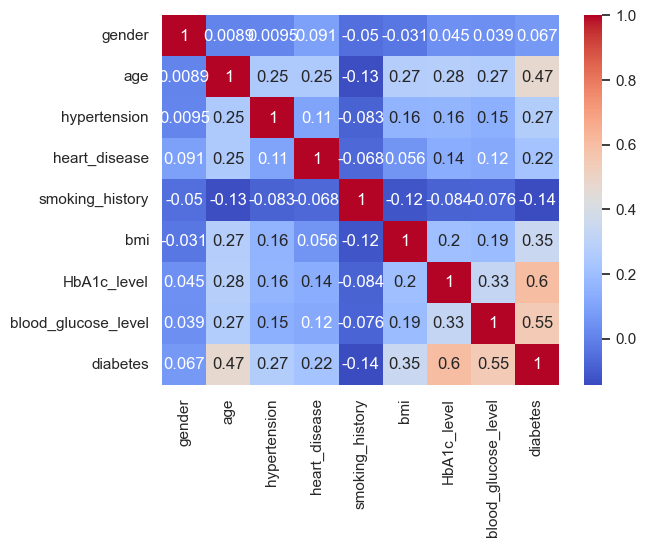

In [36]:
#plotting correlation heatmap
sns.heatmap(raw_data.corr(),annot=True, cmap='coolwarm')

In [37]:



value_counts = raw_data['diabetes'].value_counts()

# Access the count for 0
count_0 = value_counts[0]

# Access the count for 1
count_1 = value_counts[1]

# Print the counts
print("Count of 0:", count_0)
print("Count of 1:", count_1)


Count of 0: 10200
Count of 1: 8500


In [38]:
Inputs = raw_data[['blood_glucose_level', 'HbA1c_level','age','bmi']]
targets = raw_data['diabetes']

Data Visualization

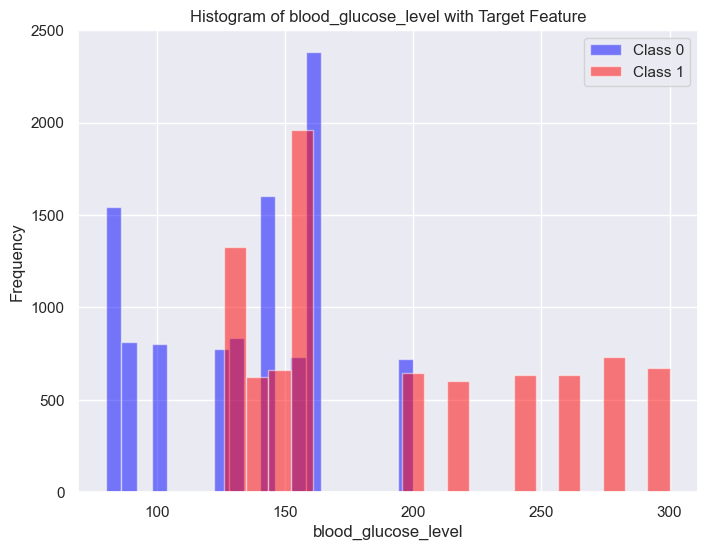

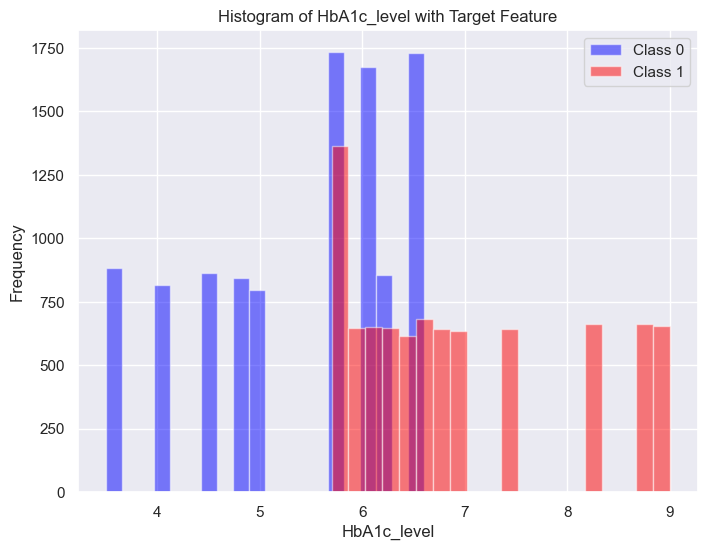

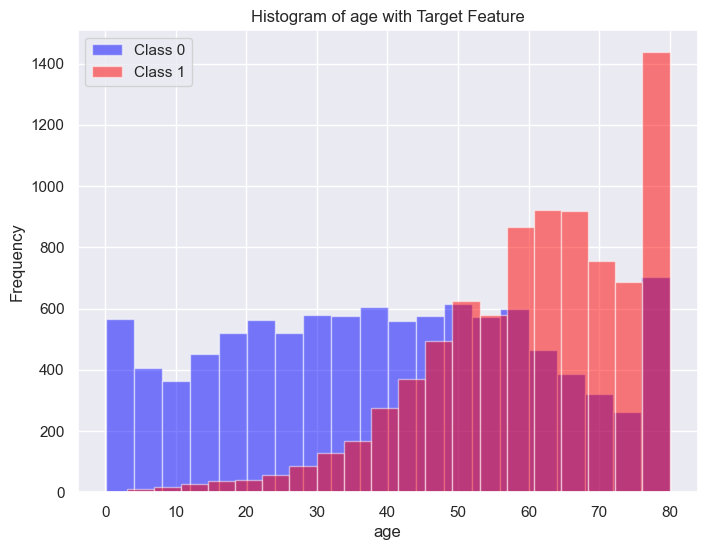

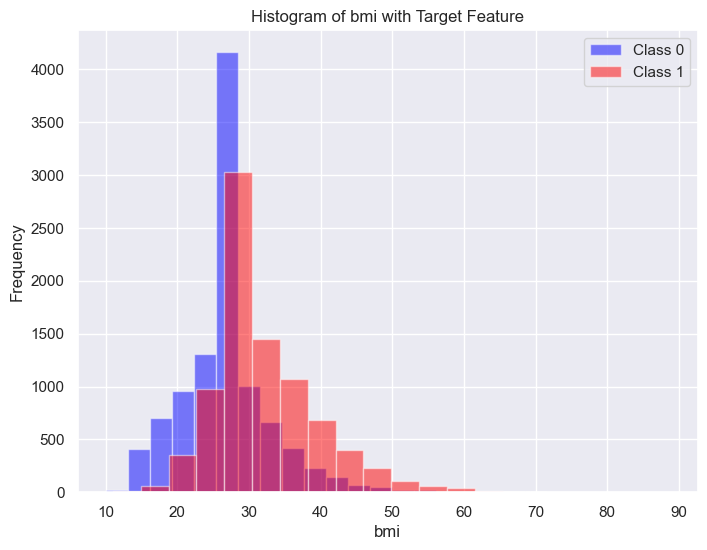

In [39]:
#plotting histograms between input features and targets
for feature in Inputs.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(Inputs[feature][targets == 0], bins=20, alpha=0.5, color='blue', label='Class 0')
    plt.hist(Inputs[feature][targets == 1], bins=20, alpha=0.5, color='red', label='Class 1')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {feature} with Target Feature')
    plt.legend()
    plt.show()

Train_Test_Split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(Inputs, targets, test_size=0.2, random_state=42)

In [41]:
logR = LogisticRegression(penalty="l2", solver="liblinear")
logR.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [42]:
y_pred = logR.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
print(acc_score*100)

88.34224598930481


In [43]:

f1_sco = f1_score(y_test, y_pred)
print(f1_sco*100)

86.96951583980872


In [44]:
con = confusion_matrix(y_test, y_pred)
print(con)

[[1849  186]
 [ 250 1455]]


In [45]:
clf = classification_report(y_test, y_pred)

In [46]:
print(clf)

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      2035
           1       0.89      0.85      0.87      1705

    accuracy                           0.88      3740
   macro avg       0.88      0.88      0.88      3740
weighted avg       0.88      0.88      0.88      3740



In [47]:
TN = con[0,0]
FP = con[0,1]

TNR = (TN / (TN+FP))*100

TP = con[1,1]
FN = con[1,0]

TPR = (TP / (TP + FN))*100




print("TPR (Sensitivity/Recall):", TPR)
print("TNR (True Negative Rate/ Specificity):", TNR)

TPR (Sensitivity/Recall): 85.33724340175954
TNR (True Negative Rate/ Specificity): 90.85995085995086


In [48]:
NB = GaussianNB()
NB.fit(X_train, y_train)

GaussianNB()

In [49]:
y_pred = NB.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
print(acc_score*100)

86.89839572192514


In [50]:

f1_sco = f1_score(y_test, y_pred)
print(f1_sco*100)

84.87654320987653


In [51]:
con = confusion_matrix(y_test, y_pred)
print(con)

[[1875  160]
 [ 330 1375]]


In [52]:
clf = classification_report(y_test, y_pred)

In [53]:
print(clf)

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      2035
           1       0.90      0.81      0.85      1705

    accuracy                           0.87      3740
   macro avg       0.87      0.86      0.87      3740
weighted avg       0.87      0.87      0.87      3740



In [54]:
TN = con[0,0]
FP = con[0,1]

TNR = (TN / (TN+FP))*100

TP = con[1,1]
FN = con[1,0]

TPR = (TP / (TP + FN))*100




print("TPR (Sensitivity/Recall):", TPR)
print("TNR (True Negative Rate/ Specificity):", TNR)

TPR (Sensitivity/Recall): 80.64516129032258
TNR (True Negative Rate/ Specificity): 92.13759213759214


In [55]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [56]:
y_pred = svc.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
print(acc_score*100)

86.8716577540107


In [57]:

f1_sco = f1_score(y_test, y_pred)
print(f1_sco*100)

85.7308921825051


In [58]:
con = confusion_matrix(y_test, y_pred)
print(con)

[[1774  261]
 [ 230 1475]]


In [59]:
clf = classification_report(y_test, y_pred)

In [60]:
print(clf)

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      2035
           1       0.85      0.87      0.86      1705

    accuracy                           0.87      3740
   macro avg       0.87      0.87      0.87      3740
weighted avg       0.87      0.87      0.87      3740



In [61]:
TN = con[0,0]
FP = con[0,1]

TNR = (TN / (TN+FP))*100

TP = con[1,1]
FN = con[1,0]

TPR = (TP / (TP + FN))*100




print("TPR (Sensitivity/Recall):", TPR)
print("TNR (True Negative Rate/ Specificity):", TNR)

TPR (Sensitivity/Recall): 86.51026392961877
TNR (True Negative Rate/ Specificity): 87.17444717444718


In [62]:
RFC = RandomForestClassifier(criterion="entropy")
RFC.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [63]:
y_pred = RFC.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
print(acc_score*100)

89.14438502673796


In [64]:

f1_sco = f1_score(y_test, y_pred)
print(f1_sco*100)

87.98105387803434


In [65]:
con = confusion_matrix(y_test, y_pred)
print(con)

[[1848  187]
 [ 219 1486]]


In [66]:
clf = classification_report(y_test, y_pred)

In [67]:
print(clf)

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      2035
           1       0.89      0.87      0.88      1705

    accuracy                           0.89      3740
   macro avg       0.89      0.89      0.89      3740
weighted avg       0.89      0.89      0.89      3740



In [68]:
TN = con[0,0]
FP = con[0,1]

TNR = (TN / (TN+FP))*100

TP = con[1,1]
FN = con[1,0]

TPR = (TP / (TP + FN))*100




print("TPR (Sensitivity/Recall):", TPR)
print("TNR (True Negative Rate/ Specificity):", TNR)

TPR (Sensitivity/Recall): 87.15542521994135
TNR (True Negative Rate/ Specificity): 90.81081081081082


In [69]:
DTC = DecisionTreeClassifier(criterion="entropy")
DTC.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [70]:
y_pred = DTC.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
print(acc_score*100)

88.07486631016043


In [71]:

f1_sco = f1_score(y_test, y_pred)
print(f1_sco*100)

86.86690223792698


In [72]:
con = confusion_matrix(y_test, y_pred)
print(con)

[[1819  216]
 [ 230 1475]]


In [73]:
clf = classification_report(y_test, y_pred)

In [74]:
print(clf)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2035
           1       0.87      0.87      0.87      1705

    accuracy                           0.88      3740
   macro avg       0.88      0.88      0.88      3740
weighted avg       0.88      0.88      0.88      3740



In [75]:
TN = con[0,0]
FP = con[0,1]

TNR = (TN / (TN+FP))*100

TP = con[1,1]
FN = con[1,0]

TPR = (TP / (TP + FN))*100




print("TPR (Sensitivity/Recall):", TPR)
print("TNR (True Negative Rate/ Specificity):", TNR)

TPR (Sensitivity/Recall): 86.51026392961877
TNR (True Negative Rate/ Specificity): 89.38574938574939


In [76]:
XGB = xgb.XGBClassifier(learning_rate = 0.01, max_depth = 3, n_estimators = 300)

XGB.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [77]:
y_pred = XGB.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
print(acc_score*100)

89.06417112299465


In [78]:

f1_sco = f1_score(y_test, y_pred)
print(f1_sco*100)

87.23072119887605


In [79]:
con = confusion_matrix(y_test, y_pred)
print(con)

[[1934  101]
 [ 308 1397]]


In [80]:
clf = classification_report(y_test, y_pred)

In [81]:
print(clf)

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      2035
           1       0.93      0.82      0.87      1705

    accuracy                           0.89      3740
   macro avg       0.90      0.88      0.89      3740
weighted avg       0.89      0.89      0.89      3740



In [82]:
TN = con[0,0]
FP = con[0,1]

TNR = (TN / (TN+FP))*100

TP = con[1,1]
FN = con[1,0]

TPR = (TP / (TP + FN))*100




print("TPR (Sensitivity/Recall):", TPR)
print("TNR (True Negative Rate/ Specificity):", TNR)

TPR (Sensitivity/Recall): 81.93548387096774
TNR (True Negative Rate/ Specificity): 95.03685503685504


In [83]:
LGB = lgb.LGBMClassifier(learning_rate = 0.01, max_depth = 3, n_estimators = 300)
LGB.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.01, max_depth=3, n_estimators=300)

In [84]:
y_pred = LGB.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
print(acc_score*100)

88.9572192513369


In [85]:

f1_sco = f1_score(y_test, y_pred)
print(f1_sco*100)

87.06545568430943


In [86]:
con = confusion_matrix(y_test, y_pred)
print(con)

[[1937   98]
 [ 315 1390]]


In [87]:
clf = classification_report(y_test, y_pred)

In [88]:
print(clf)

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      2035
           1       0.93      0.82      0.87      1705

    accuracy                           0.89      3740
   macro avg       0.90      0.88      0.89      3740
weighted avg       0.89      0.89      0.89      3740



In [89]:
TN = con[0,0]
FP = con[0,1]

TNR = (TN / (TN+FP))*100

TP = con[1,1]
FN = con[1,0]

TPR = (TP / (TP + FN))*100




print("TPR (Sensitivity/Recall):", TPR)
print("TNR (True Negative Rate/ Specificity):", TNR)

TPR (Sensitivity/Recall): 81.52492668621701
TNR (True Negative Rate/ Specificity): 95.18427518427518


In [90]:
MLP = MLPClassifier()
MLP.fit(X_train, y_train)

MLPClassifier()

In [91]:
y_pred = MLP.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
print(acc_score*100)

88.04812834224599


In [92]:

f1_sco = f1_score(y_test, y_pred)
print(f1_sco*100)

86.31772268135906


In [93]:
con = confusion_matrix(y_test, y_pred)
print(con)

[[1883  152]
 [ 295 1410]]


In [94]:
clf = classification_report(y_test, y_pred)

In [95]:
print(clf)

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      2035
           1       0.90      0.83      0.86      1705

    accuracy                           0.88      3740
   macro avg       0.88      0.88      0.88      3740
weighted avg       0.88      0.88      0.88      3740



In [96]:
TN = con[0,0]
FP = con[0,1]

TNR = (TN / (TN+FP))*100

TP = con[1,1]
FN = con[1,0]

TPR = (TP / (TP + FN))*100




print("TPR (Sensitivity/Recall):", TPR)
print("TNR (True Negative Rate/ Specificity):", TNR)

TPR (Sensitivity/Recall): 82.69794721407625
TNR (True Negative Rate/ Specificity): 92.53071253071253


In [97]:
ADA = AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=1), n_estimators=50,
                               learning_rate=1.0, algorithm='SAMME.R', random_state=42)
ADA.fit(X_train, y_train)

d:\Anaconda\envs\tf_gpucheck\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=1),
                   random_state=42)

In [98]:
y_pred = ADA.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
print(acc_score*100)

90.93582887700535


In [99]:

f1_sco = f1_score(y_test, y_pred)
print(f1_sco*100)

90.14248328002327


In [100]:
con = confusion_matrix(y_test, y_pred)
print(con)

[[1851  184]
 [ 155 1550]]


In [101]:
clf = classification_report(y_test, y_pred)

In [102]:
print(clf)

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      2035
           1       0.89      0.91      0.90      1705

    accuracy                           0.91      3740
   macro avg       0.91      0.91      0.91      3740
weighted avg       0.91      0.91      0.91      3740



In [103]:
TN = con[0,0]
FP = con[0,1]

TNR = (TN / (TN+FP))*100

TP = con[1,1]
FN = con[1,0]

TPR = (TP / (TP + FN))*100




print("TPR (Sensitivity/Recall):", TPR)
print("TNR (True Negative Rate/ Specificity):", TNR)

TPR (Sensitivity/Recall): 90.9090909090909
TNR (True Negative Rate/ Specificity): 90.95823095823096


In [104]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

In [105]:
y_pred = qda.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
print(acc_score*100)

86.0427807486631


In [106]:

f1_sco = f1_score(y_test, y_pred)
print(f1_sco*100)

83.98773006134971


In [107]:
con = confusion_matrix(y_test, y_pred)
print(con)

[[1849  186]
 [ 336 1369]]


In [108]:
clf = classification_report(y_test, y_pred)

In [109]:
print(clf)

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      2035
           1       0.88      0.80      0.84      1705

    accuracy                           0.86      3740
   macro avg       0.86      0.86      0.86      3740
weighted avg       0.86      0.86      0.86      3740



In [110]:
TN = con[0,0]
FP = con[0,1]

TNR = (TN / (TN+FP))*100

TP = con[1,1]
FN = con[1,0]

TPR = (TP / (TP + FN))*100




print("TPR (Sensitivity/Recall):", TPR)
print("TNR (True Negative Rate/ Specificity):", TNR)

TPR (Sensitivity/Recall): 80.29325513196481
TNR (True Negative Rate/ Specificity): 90.85995085995086


KFOLD

In [141]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression()


accuracy_scores = []
f1_scores = []
confusion_matrices = []
classification_reports = []

for train_index, test_index in kfold.split(Inputs):
    X_train, X_test = Inputs.iloc[train_index], Inputs.iloc[test_index]
    y_train, y_test = targets.iloc[train_index], targets.iloc[test_index]

    # Train the model on the training set
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)
    #Calculate Classification report
    report = classification_report(y_test, y_pred, output_dict=True)

    # Append the classification report to the list
    classification_reports.append(report)

    

# Print the average accuracy score
print("Average Accuracy: %.2f%%" % (sum(accuracy_scores) / len(accuracy_scores) * 100))
print("Average F1 Score: %.2f" % (sum(f1_scores) / len(f1_scores)))
print("Average Confusion Matrix:")
print(sum(confusion_matrices))
# Print the classification reports for each fold
avg_classification_report = {
    'precision': np.mean([report['macro avg']['precision'] for report in classification_reports]),
    'recall': np.mean([report['macro avg']['recall'] for report in classification_reports]),
    'f1-score': np.mean([report['macro avg']['f1-score'] for report in classification_reports]),
    'support': np.mean([report['macro avg']['support'] for report in classification_reports])
}

# Print the average classification report
print("Average Classification Report:")
print(classification_report(y_test, y_pred))



Average Accuracy: 87.79%
Average F1 Score: 0.86
Average Confusion Matrix:
[[9140 1060]
 [1223 7277]]
Average Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      1016
           1       0.89      0.86      0.87       854

    accuracy                           0.89      1870
   macro avg       0.89      0.88      0.88      1870
weighted avg       0.89      0.89      0.89      1870



In [142]:
con = sum(confusion_matrices)
TN = con[0,0]
FP = con[0,1]

TNR = (TN / (TN+FP))*100

TP = con[1,1]
FN = con[1,0]

TPR = (TP / (TP + FN))*100




print("TPR (Sensitivity/Recall):", TPR)
print("TNR (True Negative Rate/ Specificity):", TNR)

TPR (Sensitivity/Recall): 85.61176470588235
TNR (True Negative Rate/ Specificity): 89.6078431372549


In [143]:
NB = GaussianNB()


accuracy_scores = []
f1_scores = []
confusion_matrices = []
classification_reports = []

for train_index, test_index in kfold.split(Inputs):
    X_train, X_test = Inputs.iloc[train_index], Inputs.iloc[test_index]
    y_train, y_test = targets.iloc[train_index], targets.iloc[test_index]

    # Train the model on the training set
    NB.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = NB.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)
        #Calculate Classification report
    report = classification_report(y_test, y_pred, output_dict=True)

    # Append the classification report to the list
    classification_reports.append(report)

# Print the average accuracy score
print("Average Accuracy: %.2f%%" % (sum(accuracy_scores) / len(accuracy_scores) * 100))
print("Average F1 Score: %.2f" % (sum(f1_scores) / len(f1_scores)))
print("Average Confusion Matrix:")
print(sum(confusion_matrices))
# Print the AVERAGE classification report
avg_classification_report = {
    'precision': np.mean([report['macro avg']['precision'] for report in classification_reports]),
    'recall': np.mean([report['macro avg']['recall'] for report in classification_reports]),
    'f1-score': np.mean([report['macro avg']['f1-score'] for report in classification_reports]),
    'support': np.mean([report['macro avg']['support'] for report in classification_reports])
}

# Print the average classification report
print("Average Classification Report:")
print(classification_report(y_test, y_pred))


Average Accuracy: 86.55%
Average F1 Score: 0.85
Average Confusion Matrix:
[[9317  883]
 [1633 6867]]
Average Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1016
           1       0.90      0.81      0.85       854

    accuracy                           0.87      1870
   macro avg       0.87      0.86      0.87      1870
weighted avg       0.87      0.87      0.87      1870



In [144]:
con = sum(confusion_matrices)
TN = con[0,0]
FP = con[0,1]

TNR = (TN / (TN+FP))*100

TP = con[1,1]
FN = con[1,0]

TPR = (TP / (TP + FN))*100




print("TPR (Sensitivity/Recall):", TPR)
print("TNR (True Negative Rate/ Specificity):", TNR)

TPR (Sensitivity/Recall): 80.78823529411765
TNR (True Negative Rate/ Specificity): 91.34313725490196


In [145]:
svc = SVC()


accuracy_scores = []
f1_scores = []
confusion_matrices = []
classification_reports = []



for train_index, test_index in kfold.split(Inputs):
    X_train, X_test = Inputs.iloc[train_index], Inputs.iloc[test_index]
    y_train, y_test = targets.iloc[train_index], targets.iloc[test_index]

    # Train the model on the training set
    svc.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = svc.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)
         #Calculate Classification report
    report = classification_report(y_test, y_pred, output_dict=True)

    # Append the classification report to the list
    classification_reports.append(report)


# Print the average accuracy score
print("Average Accuracy: %.2f%%" % (sum(accuracy_scores) / len(accuracy_scores) * 100))
print("Average F1 Score: %.2f" % (sum(f1_scores) / len(f1_scores)))
print("Average Confusion Matrix:")
print(sum(confusion_matrices))
# Print the AVERAGE classification report
avg_classification_report = {
    'precision': np.mean([report['macro avg']['precision'] for report in classification_reports]),
    'recall': np.mean([report['macro avg']['recall'] for report in classification_reports]),
    'f1-score': np.mean([report['macro avg']['f1-score'] for report in classification_reports]),
    'support': np.mean([report['macro avg']['support'] for report in classification_reports])
}

# Print the average classification report
print("Average Classification Report:")
print(classification_report(y_test, y_pred))


Average Accuracy: 87.05%
Average F1 Score: 0.86
Average Confusion Matrix:
[[8875 1325]
 [1096 7404]]
Average Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      1016
           1       0.85      0.86      0.85       854

    accuracy                           0.87      1870
   macro avg       0.86      0.87      0.86      1870
weighted avg       0.87      0.87      0.87      1870



In [146]:
con = sum(confusion_matrices)
TN = con[0,0]
FP = con[0,1]

TNR = (TN / (TN+FP))*100

TP = con[1,1]
FN = con[1,0]

TPR = (TP / (TP + FN))*100




print("TPR (Sensitivity/Recall):", TPR)
print("TNR (True Negative Rate/ Specificity):", TNR)

TPR (Sensitivity/Recall): 87.10588235294118
TNR (True Negative Rate/ Specificity): 87.00980392156863


In [147]:
RDF = RandomForestClassifier()


accuracy_scores = []
f1_scores = []
confusion_matrices = []
classification_reports = []


for train_index, test_index in kfold.split(Inputs):
    X_train, X_test = Inputs.iloc[train_index], Inputs.iloc[test_index]
    y_train, y_test = targets.iloc[train_index], targets.iloc[test_index]

    # Train the model on the training set
    RDF.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = RDF.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)
    #Calculate Classification report
    report = classification_report(y_test, y_pred, output_dict=True)

    # Append the classification report to the list
    classification_reports.append(report)


# Print the average accuracy score
print("Average Accuracy: %.2f%%" % (sum(accuracy_scores) / len(accuracy_scores) * 100))
print("Average F1 Score: %.2f" % (sum(f1_scores) / len(f1_scores)))
print("Average Confusion Matrix:")
print(sum(confusion_matrices))
# Print the AVERAGE classification report
avg_classification_report = {
    'precision': np.mean([report['macro avg']['precision'] for report in classification_reports]),
    'recall': np.mean([report['macro avg']['recall'] for report in classification_reports]),
    'f1-score': np.mean([report['macro avg']['f1-score'] for report in classification_reports]),
    'support': np.mean([report['macro avg']['support'] for report in classification_reports])
}

# Print the average classification report
print("Average Classification Report:")
print(classification_report(y_test, y_pred))


Average Accuracy: 89.05%
Average F1 Score: 0.88
Average Confusion Matrix:
[[9189 1011]
 [1037 7463]]
Average Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1016
           1       0.88      0.89      0.88       854

    accuracy                           0.89      1870
   macro avg       0.89      0.89      0.89      1870
weighted avg       0.89      0.89      0.89      1870



In [148]:
con = sum(confusion_matrices)
TN = con[0,0]
FP = con[0,1]

TNR = (TN / (TN+FP))*100

TP = con[1,1]
FN = con[1,0]

TPR = (TP / (TP + FN))*100




print("TPR (Sensitivity/Recall):", TPR)
print("TNR (True Negative Rate/ Specificity):", TNR)

TPR (Sensitivity/Recall): 87.8
TNR (True Negative Rate/ Specificity): 90.08823529411765


In [149]:
DTS = DecisionTreeClassifier()


accuracy_scores = []
f1_scores = []
confusion_matrices = []
classification_reports = []

for train_index, test_index in kfold.split(Inputs):
    X_train, X_test = Inputs.iloc[train_index], Inputs.iloc[test_index]
    y_train, y_test = targets.iloc[train_index], targets.iloc[test_index]

    # Train the model on the training set
    DTS.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = DTS.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)
    #Calculate Classification report
    report = classification_report(y_test, y_pred, output_dict=True)

    # Append the classification report to the list
    classification_reports.append(report)


# Print the average accuracy score
print("Average Accuracy: %.2f%%" % (sum(accuracy_scores) / len(accuracy_scores) * 100))
print("Average F1 Score: %.2f" % (sum(f1_scores) / len(f1_scores)))
print("Average Confusion Matrix:")
print(sum(confusion_matrices))
# Print the AVERAGE classification report
avg_classification_report = {
    'precision': np.mean([report['macro avg']['precision'] for report in classification_reports]),
    'recall': np.mean([report['macro avg']['recall'] for report in classification_reports]),
    'f1-score': np.mean([report['macro avg']['f1-score'] for report in classification_reports]),
    'support': np.mean([report['macro avg']['support'] for report in classification_reports])
}

# Print the average classification report
print("Average Classification Report:")
print(classification_report(y_test, y_pred))

Average Accuracy: 87.30%
Average F1 Score: 0.86
Average Confusion Matrix:
[[9041 1159]
 [1216 7284]]
Average Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1016
           1       0.85      0.87      0.86       854

    accuracy                           0.87      1870
   macro avg       0.87      0.87      0.87      1870
weighted avg       0.87      0.87      0.87      1870



In [150]:
con = sum(confusion_matrices)
TN = con[0,0]
FP = con[0,1]

TNR = (TN / (TN+FP))*100

TP = con[1,1]
FN = con[1,0]

TPR = (TP / (TP + FN))*100




print("TPR (Sensitivity/Recall):", TPR)
print("TNR (True Negative Rate/ Specificity):", TNR)

TPR (Sensitivity/Recall): 85.69411764705882
TNR (True Negative Rate/ Specificity): 88.63725490196079


In [151]:
XGB = xgb.XGBClassifier(learning_rate = 0.01, max_depth = 3, n_estimators = 300)


accuracy_scores = []
f1_scores = []
confusion_matrices = []
classification_reports = []
for train_index, test_index in kfold.split(Inputs):
    X_train, X_test = Inputs.iloc[train_index], Inputs.iloc[test_index]
    y_train, y_test = targets.iloc[train_index], targets.iloc[test_index]

    # Train the model on the training set
    XGB.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = XGB.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)
     #Calculate Classification report
    report = classification_report(y_test, y_pred, output_dict=True)

    # Append the classification report to the list
    classification_reports.append(report)


# Print the average accuracy score
print("Average Accuracy: %.2f%%" % (sum(accuracy_scores) / len(accuracy_scores) * 100))
print("Average F1 Score: %.2f" % (sum(f1_scores) / len(f1_scores)))
print("Average Confusion Matrix:")
print(sum(confusion_matrices))
# Print the AVERAGE classification report
avg_classification_report = {
    'precision': np.mean([report['macro avg']['precision'] for report in classification_reports]),
    'recall': np.mean([report['macro avg']['recall'] for report in classification_reports]),
    'f1-score': np.mean([report['macro avg']['f1-score'] for report in classification_reports]),
    'support': np.mean([report['macro avg']['support'] for report in classification_reports])
}

# Print the average classification report
print("Average Classification Report:")
print(classification_report(y_test, y_pred))

Average Accuracy: 89.24%
Average F1 Score: 0.88
Average Confusion Matrix:
[[9498  702]
 [1311 7189]]
Average Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      1016
           1       0.88      0.91      0.89       854

    accuracy                           0.90      1870
   macro avg       0.90      0.90      0.90      1870
weighted avg       0.90      0.90      0.90      1870



In [152]:
con = sum(confusion_matrices)
TN = con[0,0]
FP = con[0,1]

TNR = (TN / (TN+FP))*100

TP = con[1,1]
FN = con[1,0]

TPR = (TP / (TP + FN))*100




print("TPR (Sensitivity/Recall):", TPR)
print("TNR (True Negative Rate/ Specificity):", TNR)

TPR (Sensitivity/Recall): 84.5764705882353
TNR (True Negative Rate/ Specificity): 93.11764705882352


In [153]:
LGB = lgb.LGBMClassifier(learning_rate = 0.01, max_depth = 3, n_estimators = 300)


accuracy_scores = []
f1_scores = []
confusion_matrices = []
classification_reports = []
for train_index, test_index in kfold.split(Inputs):
    X_train, X_test = Inputs.iloc[train_index], Inputs.iloc[test_index]
    y_train, y_test = targets.iloc[train_index], targets.iloc[test_index]

    # Train the model on the training set
    LGB.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = LGB.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)
     #Calculate Classification report
    report = classification_report(y_test, y_pred, output_dict=True)

    # Append the classification report to the list
    classification_reports.append(report)


# Print the average accuracy score
print("Average Accuracy: %.2f%%" % (sum(accuracy_scores) / len(accuracy_scores) * 100))
print("Average F1 Score: %.2f" % (sum(f1_scores) / len(f1_scores)))
print("Average Confusion Matrix:")
print(sum(confusion_matrices))
# Print the AVERAGE classification report
avg_classification_report = {
    'precision': np.mean([report['macro avg']['precision'] for report in classification_reports]),
    'recall': np.mean([report['macro avg']['recall'] for report in classification_reports]),
    'f1-score': np.mean([report['macro avg']['f1-score'] for report in classification_reports]),
    'support': np.mean([report['macro avg']['support'] for report in classification_reports])
}

# Print the average classification report
print("Average Classification Report:")
print(classification_report(y_test, y_pred))

Average Accuracy: 89.23%
Average F1 Score: 0.88
Average Confusion Matrix:
[[9560  640]
 [1374 7126]]
Average Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1016
           1       0.94      0.83      0.88       854

    accuracy                           0.90      1870
   macro avg       0.91      0.89      0.90      1870
weighted avg       0.90      0.90      0.90      1870



In [154]:
con = sum(confusion_matrices)
TN = con[0,0]
FP = con[0,1]

TNR = (TN / (TN+FP))*100

TP = con[1,1]
FN = con[1,0]

TPR = (TP / (TP + FN))*100




print("TPR (Sensitivity/Recall):", TPR)
print("TNR (True Negative Rate/ Specificity):", TNR)

TPR (Sensitivity/Recall): 83.83529411764707
TNR (True Negative Rate/ Specificity): 93.72549019607843


In [155]:
MLP = MLPClassifier()


accuracy_scores = []
f1_scores = []
confusion_matrices = []
classification_reports = []

for train_index, test_index in kfold.split(Inputs):
    X_train, X_test = Inputs.iloc[train_index], Inputs.iloc[test_index]
    y_train, y_test = targets.iloc[train_index], targets.iloc[test_index]

    # Train the model on the training set
    MLP.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = MLP.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)
     #Calculate Classification report
    report = classification_report(y_test, y_pred, output_dict=True)

    # Append the classification report to the list
    classification_reports.append(report)
# Print the average accuracy score
print("Average Accuracy: %.2f%%" % (sum(accuracy_scores) / len(accuracy_scores) * 100))
print("Average F1 Score: %.2f" % (sum(f1_scores) / len(f1_scores)))
print("Average Confusion Matrix:")
print(sum(confusion_matrices))
# Print the AVERAGE classification report
avg_classification_report = {
    'precision': np.mean([report['macro avg']['precision'] for report in classification_reports]),
    'recall': np.mean([report['macro avg']['recall'] for report in classification_reports]),
    'f1-score': np.mean([report['macro avg']['f1-score'] for report in classification_reports]),
    'support': np.mean([report['macro avg']['support'] for report in classification_reports])
}

# Print the average classification report
print("Average Classification Report:")
print(classification_report(y_test, y_pred))

Average Accuracy: 87.76%
Average F1 Score: 0.86
Average Confusion Matrix:
[[9090 1110]
 [1178 7322]]
Average Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.89      1016
           1       0.93      0.80      0.86       854

    accuracy                           0.88      1870
   macro avg       0.89      0.87      0.88      1870
weighted avg       0.88      0.88      0.88      1870



In [156]:
con = sum(confusion_matrices)
TN = con[0,0]
FP = con[0,1]

TNR = (TN / (TN+FP))*100

TP = con[1,1]
FN = con[1,0]

TPR = (TP / (TP + FN))*100




print("TPR (Sensitivity/Recall):", TPR)
print("TNR (True Negative Rate/ Specificity):", TNR)

TPR (Sensitivity/Recall): 86.14117647058823
TNR (True Negative Rate/ Specificity): 89.11764705882354


In [157]:
ADA = AdaBoostClassifier()


accuracy_scores = []
f1_scores = []
confusion_matrices = []
classification_reports = []
for train_index, test_index in kfold.split(Inputs):
    X_train, X_test = Inputs.iloc[train_index], Inputs.iloc[test_index]
    y_train, y_test = targets.iloc[train_index], targets.iloc[test_index]

    # Train the model on the training set
    ADA.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = ADA.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)
    #Calculate Classification report
    report = classification_report(y_test, y_pred, output_dict=True)

    # Append the classification report to the list
    classification_reports.append(report)

# Print the average accuracy score
print("Average Accuracy: %.2f%%" % (sum(accuracy_scores) / len(accuracy_scores) * 100))
print("Average F1 Score: %.2f" % (sum(f1_scores) / len(f1_scores)))
print("Average Confusion Matrix:")
print(sum(confusion_matrices))
# Print the AVERAGE classification report
avg_classification_report = {
    'precision': np.mean([report['macro avg']['precision'] for report in classification_reports]),
    'recall': np.mean([report['macro avg']['recall'] for report in classification_reports]),
    'f1-score': np.mean([report['macro avg']['f1-score'] for report in classification_reports]),
    'support': np.mean([report['macro avg']['support'] for report in classification_reports])
}

# Print the average classification report
print("Average Classification Report:")
print(classification_report(y_test, y_pred))

Average Accuracy: 90.64%
Average F1 Score: 0.90
Average Confusion Matrix:
[[9167 1033]
 [ 718 7782]]
Average Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.91      1016
           1       0.88      0.91      0.90       854

    accuracy                           0.91      1870
   macro avg       0.91      0.91      0.91      1870
weighted avg       0.91      0.91      0.91      1870



In [158]:
con = sum(confusion_matrices)
TN = con[0,0]
FP = con[0,1]

TNR = (TN / (TN+FP))*100

TP = con[1,1]
FN = con[1,0]

TPR = (TP / (TP + FN))*100




print("TPR (Sensitivity/Recall):", TPR)
print("TNR (True Negative Rate/ Specificity):", TNR)

TPR (Sensitivity/Recall): 91.5529411764706
TNR (True Negative Rate/ Specificity): 89.87254901960785


In [159]:
qda = QuadraticDiscriminantAnalysis()


accuracy_scores = []
f1_scores = []
confusion_matrices = []
classification_reports = []

for train_index, test_index in kfold.split(Inputs):
    X_train, X_test = Inputs.iloc[train_index], Inputs.iloc[test_index]
    y_train, y_test = targets.iloc[train_index], targets.iloc[test_index]

    # Train the model on the training set
    qda.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = qda.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)
    #Calculate Classification report
    report = classification_report(y_test, y_pred, output_dict=True)

    # Append the classification report to the list
    classification_reports.append(report)

# Print the average accuracy score
print("Average Accuracy: %.2f%%" % (sum(accuracy_scores) / len(accuracy_scores) * 100))
print("Average F1 Score: %.2f" % (sum(f1_scores) / len(f1_scores)))
print("Average Confusion Matrix:")
print(sum(confusion_matrices))
# Print the AVERAGE classification report
avg_classification_report = {
    'precision': np.mean([report['macro avg']['precision'] for report in classification_reports]),
    'recall': np.mean([report['macro avg']['recall'] for report in classification_reports]),
    'f1-score': np.mean([report['macro avg']['f1-score'] for report in classification_reports]),
    'support': np.mean([report['macro avg']['support'] for report in classification_reports])
}

# Print the average classification report
print("Average Classification Report:")
print(classification_report(y_test, y_pred))

Average Accuracy: 85.82%
Average F1 Score: 0.84
Average Confusion Matrix:
[[9230  970]
 [1682 6818]]
Average Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1016
           1       0.88      0.80      0.84       854

    accuracy                           0.86      1870
   macro avg       0.86      0.86      0.86      1870
weighted avg       0.86      0.86      0.86      1870



In [160]:
con = sum(confusion_matrices)
TN = con[0,0]
FP = con[0,1]

TNR = (TN / (TN+FP))*100

TP = con[1,1]
FN = con[1,0]

TPR = (TP / (TP + FN))*100




print("TPR (Sensitivity/Recall):", TPR)
print("TNR (True Negative Rate/ Specificity):", TNR)

TPR (Sensitivity/Recall): 80.21176470588235
TNR (True Negative Rate/ Specificity): 90.49019607843137


In [161]:
pickle.dump(ADA,open( 'ada_trained_model.pkl', 'wb'))

Application phase

From the above trained models we can see that our AdaClassifier gives us more accuracy and f1_score, so we will use it in Application Phase

In [9]:
blood_glucose_level = float(input("Enter blood glucose level: "))
hba1c_level = float(input("Enter HbA1c level: "))
age = float(input("Enter age: "))
bmi = float(input("Enter BMI: "))

In [10]:
user_input = pd.DataFrame({'blood_glucose_level':[blood_glucose_level], 'HbA1c_level':[hba1c_level], 'age':[age], 'bmi':[bmi]})
print("\n\nUser Input Feature Vector:")
print("==========================\n")
print(user_input)



User Input Feature Vector:

   blood_glucose_level  HbA1c_level   age   bmi
0                160.0          7.7  56.0  27.0


In [11]:

model = pickle.load(open('ada_trained_model.pkl', 'rb'))

In [12]:
# Make a Prediction on Unseen Data

from prettytable import PrettyTable 


predicted_diabetic = model.predict(user_input)

if(predicted_diabetic == 1): 
    prediction = "Diabetic"
if(predicted_diabetic == 0):
    prediction = "NO Diabetes"

# Add the Prediction in a Pretty Table

pretty_table = PrettyTable()
pretty_table.add_column("       ** Prediction **       ",[prediction])
print(pretty_table)

+--------------------------------+
|        ** Prediction **        |
+--------------------------------+
|            Diabetic            |
+--------------------------------+
